In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import geopandas as gpd

In [2]:
damage = pd.read_csv("../input/houstondamage/DR-4332_TX_-_Housing_Damage_by_Block_Group.csv")
demographics = pd.read_csv("../input/city-of-houston-hurricane-harvey-damage-assessment/Harvey_BG.csv")
svi=pd.read_csv("../input/texas-social-vulnerability-by-census-tract/Texas.csv")

In [3]:
demographics.head()

,State,County,Tract,BLKGRP,Geography,Pop_Total,NH_White,NH_Black,NH_AmInd_A,NH_Asian,...,Housing_Un,Occupied,Vacant,MHI_ACS,Count_Affe,Children_U,SeniorCiti,Count_Af_1,Shape_Leng,Shape_Area
0,48,157,670101,1,"Block Group 1, Census Tract 6701.01, Fort Bend...",1092.0,54.0,248.0,0.0,0.0,...,311.0,285.0,26.0,47321.0,40,142.0,112.0,39,11380.091047,4.257484e+06
1,48,157,670101,2,"Block Group 2, Census Tract 6701.01, Fort Bend...",1821.0,0.0,577.0,0.0,0.0,...,517.0,466.0,51.0,39196.0,79,87.0,129.0,79,12471.490333,6.885016e+06
2,48,157,670101,3,"Block Group 3, Census Tract 6701.01, Fort Bend...",2974.0,34.0,1676.0,0.0,0.0,...,912.0,790.0,122.0,49474.0,230,277.0,203.0,224,22028.626641,2.170860e+07
3,48,157,670101,4,"Block Group 4, Census Tract 6701.01, Fort Bend...",1495.0,89.0,82.0,0.0,0.0,...,333.0,322.0,11.0,32619.0,46,69.0,146.0,46,7731.396743,3.148187e+06
4,48,157,670102,1,"Block Group 1, Census Tract 6701.02, Fort Bend...",2251.0,7.0,1120.0,0.0,6.0,...,781.0,716.0,65.0,43026.0,154,152.0,108.0,151,11680.485434,8.460550e+06


In [4]:
dropped=demographics.drop(columns=['Geography','State','Shape_Leng','Shape_Leng','Count_Af_1'])

In [5]:
dropped['county_name']=dropped.County.replace(to_replace = [157,201,339],value = ['Fort Bend','Harris','Montgomery'])

In [6]:
dropped['Percent_White']=pd.Series(dropped['NH_White']/dropped['Pop_Total'])
dropped['Percent_Black']=pd.Series(dropped['NH_Black']/dropped['Pop_Total'])
dropped['Percent_AmInd']=pd.Series(dropped['NH_AmInd_A']/dropped['Pop_Total'])
dropped['Percent_Asian']=pd.Series(dropped['NH_Asian']/dropped['Pop_Total'])
dropped['Percent_Native']=pd.Series(dropped['NH_Native_']/dropped['Pop_Total'])
dropped['Percent_Mixed']=pd.Series(dropped['NH_Two_Mor']/dropped['Pop_Total'])
dropped['Percent_Hispanic']=pd.Series(dropped['Hispanic']/dropped['Pop_Total'])
dropped['Percent_Child']=pd.Series(dropped['Children_U']/dropped['Pop_Total'])
dropped['Percent_Senior']=pd.Series(dropped['SeniorCiti']/dropped['Pop_Total'])
dropped['PopDensity']=pd.Series(dropped['Pop_Total']/dropped['Shape_Area'])


dropped

,County,Tract,BLKGRP,Pop_Total,NH_White,NH_Black,NH_AmInd_A,NH_Asian,NH_Native_,NH_Some_Ot,...,Percent_White,Percent_Black,Percent_AmInd,Percent_Asian,Percent_Native,Percent_Mixed,Percent_Hispanic,Percent_Child,Percent_Senior,PopDensity
0,157,670101,1,1092.0,54.0,248.0,0.0,0.0,0.0,0.0,...,0.049451,0.227106,0.000000,0.000000,0.000000,0.009158,0.714286,0.130037,0.102564,0.000256
1,157,670101,2,1821.0,0.0,577.0,0.0,0.0,0.0,0.0,...,0.000000,0.316859,0.000000,0.000000,0.000000,0.000000,0.683141,0.047776,0.070840,0.000264
2,157,670101,3,2974.0,34.0,1676.0,0.0,0.0,0.0,0.0,...,0.011432,0.563551,0.000000,0.000000,0.000000,0.022865,0.402152,0.093141,0.068258,0.000137
3,157,670101,4,1495.0,89.0,82.0,0.0,0.0,0.0,0.0,...,0.059532,0.054849,0.000000,0.000000,0.000000,0.000000,0.885619,0.046154,0.097659,0.000475
4,157,670102,1,2251.0,7.0,1120.0,0.0,6.0,0.0,0.0,...,0.003110,0.497557,0.000000,0.002665,0.000000,0.000000,0.496668,0.067526,0.047979,0.000266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,339,692300,2,1619.0,664.0,53.0,89.0,34.0,32.0,0.0,...,0.410130,0.032736,0.054972,0.021001,0.019765,0.000000,0.461396,0.072267,0.276096,0.000016
2535,339,692500,1,1030.0,697.0,8.0,186.0,0.0,0.0,0.0,...,0.676699,0.007767,0.180583,0.000000,0.000000,0.039806,0.095146,0.036893,0.165049,0.000006
2536,339,692801,3,1382.0,853.0,0.0,9.0,0.0,0.0,0.0,...,0.617221,0.000000,0.006512,0.000000,0.000000,0.223589,0.152677,0.034732,0.086107,0.000010
2537,339,694101,3,751.0,225.0,257.0,0.0,0.0,0.0,0.0,...,0.299601,0.342210,0.000000,0.000000,0.000000,0.000000,0.358189,0.195739,0.166445,0.000044


In [7]:
dropped=dropped.drop(columns=['NH_White','NH_Black','NH_AmInd_A','NH_Asian','NH_Native_','NH_Some_Ot','NH_Two_Mor','Hispanic'])
dropped

,County,Tract,BLKGRP,Pop_Total,Households,Housing_Un,Occupied,Vacant,MHI_ACS,Count_Affe,...,Percent_White,Percent_Black,Percent_AmInd,Percent_Asian,Percent_Native,Percent_Mixed,Percent_Hispanic,Percent_Child,Percent_Senior,PopDensity
0,157,670101,1,1092.0,285.0,311.0,285.0,26.0,47321.0,40,...,0.049451,0.227106,0.000000,0.000000,0.000000,0.009158,0.714286,0.130037,0.102564,0.000256
1,157,670101,2,1821.0,466.0,517.0,466.0,51.0,39196.0,79,...,0.000000,0.316859,0.000000,0.000000,0.000000,0.000000,0.683141,0.047776,0.070840,0.000264
2,157,670101,3,2974.0,790.0,912.0,790.0,122.0,49474.0,230,...,0.011432,0.563551,0.000000,0.000000,0.000000,0.022865,0.402152,0.093141,0.068258,0.000137
3,157,670101,4,1495.0,322.0,333.0,322.0,11.0,32619.0,46,...,0.059532,0.054849,0.000000,0.000000,0.000000,0.000000,0.885619,0.046154,0.097659,0.000475
4,157,670102,1,2251.0,716.0,781.0,716.0,65.0,43026.0,154,...,0.003110,0.497557,0.000000,0.002665,0.000000,0.000000,0.496668,0.067526,0.047979,0.000266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,339,692300,2,1619.0,604.0,682.0,604.0,78.0,0.0,0,...,0.410130,0.032736,0.054972,0.021001,0.019765,0.000000,0.461396,0.072267,0.276096,0.000016
2535,339,692500,1,1030.0,293.0,293.0,293.0,0.0,0.0,0,...,0.676699,0.007767,0.180583,0.000000,0.000000,0.039806,0.095146,0.036893,0.165049,0.000006
2536,339,692801,3,1382.0,434.0,462.0,434.0,28.0,0.0,0,...,0.617221,0.000000,0.006512,0.000000,0.000000,0.223589,0.152677,0.034732,0.086107,0.000010
2537,339,694101,3,751.0,256.0,256.0,256.0,0.0,0.0,0,...,0.299601,0.342210,0.000000,0.000000,0.000000,0.000000,0.358189,0.195739,0.166445,0.000044


[Text(0.5, 0, 'County'),
 Text(1.5, 0, 'Tract'),
 Text(2.5, 0, 'BLKGRP'),
 Text(3.5, 0, 'Pop_Total'),
 Text(4.5, 0, 'Households'),
 Text(5.5, 0, 'Housing_Un'),
 Text(6.5, 0, 'Occupied'),
 Text(7.5, 0, 'Vacant'),
 Text(8.5, 0, 'MHI_ACS'),
 Text(9.5, 0, 'Count_Affe'),
 Text(10.5, 0, 'Children_U'),
 Text(11.5, 0, 'SeniorCiti'),
 Text(12.5, 0, 'Shape_Area'),
 Text(13.5, 0, 'Percent_White'),
 Text(14.5, 0, 'Percent_Black'),
 Text(15.5, 0, 'Percent_AmInd'),
 Text(16.5, 0, 'Percent_Asian'),
 Text(17.5, 0, 'Percent_Native'),
 Text(18.5, 0, 'Percent_Mixed'),
 Text(19.5, 0, 'Percent_Hispanic'),
 Text(20.5, 0, 'Percent_Child'),
 Text(21.5, 0, 'Percent_Senior'),
 Text(22.5, 0, 'PopDensity'),
 Text(23.5, 0, 'Percent_Aff')]

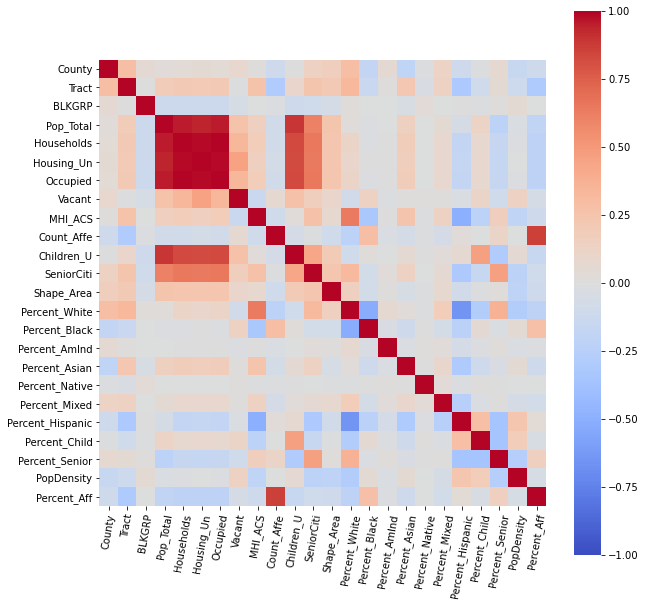

In [8]:
dropped['Percent_Aff']=dropped['Count_Affe']/dropped['Housing_Un']
corr=dropped.corr()
plt.figure(figsize=(10,10))
thing = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
        square=True,
)
thing.set_xticklabels(labels=thing.get_xticklabels(),rotation=80)

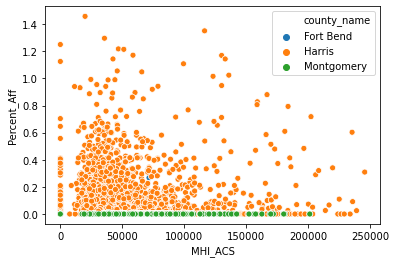

In [9]:
sns.scatterplot(x='MHI_ACS',y='Percent_Aff',hue='county_name',data=dropped)

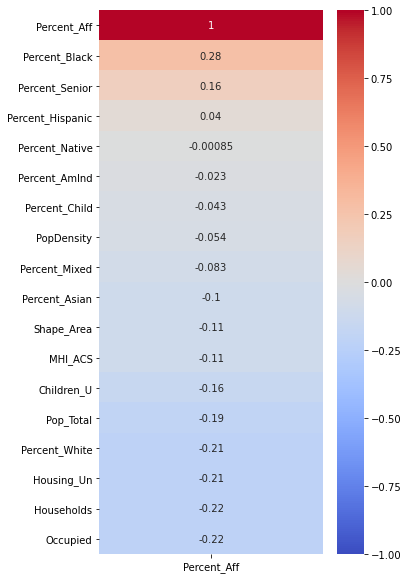

In [10]:
plt.figure(figsize=(5,10))
sns.heatmap(dropped.drop(columns=['Count_Affe','BLKGRP','Vacant','County','SeniorCiti','Tract']).corr()[['Percent_Aff']].sort_values(by=['Percent_Aff'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);


county_name
Fort Bend       1781
Harris        157030
Montgomery        22
Name: Count_Affe, dtype: int64
  county_name  Count_Affe
0   Fort Bend        1781
1      Harris      157030
2  Montgomery          22


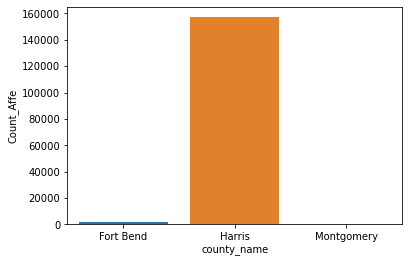

In [11]:

bycounty = dropped.groupby(['county_name'])

thing=bycounty.Count_Affe.agg(sum)
print(thing)
data=pd.DataFrame(thing).reset_index()
print(data)
sns.barplot(x='county_name',y='Count_Affe',data=data)

In [12]:
zipper=[]
for thing in dropped['MHI_ACS']:
    zipper.append(thing//20000 * 20000)

In [13]:
demographics['IncomeBracket']=zipper

In [14]:
brack=demographics.groupby('IncomeBracket').agg(sum)

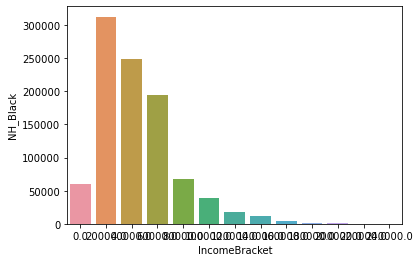

In [15]:
sns.barplot(x=brack.index,y='NH_Black',data=brack)


[Text(0, 0, '0.0'),
 Text(0, 0, '20000.0'),
 Text(0, 0, '40000.0'),
 Text(0, 0, '60000.0'),
 Text(0, 0, '80000.0'),
 Text(0, 0, '100000.0'),
 Text(0, 0, '120000.0'),
 Text(0, 0, '140000.0'),
 Text(0, 0, '160000.0'),
 Text(0, 0, '180000.0'),
 Text(0, 0, '200000.0'),
 Text(0, 0, '220000.0'),
 Text(0, 0, '240000.0')]

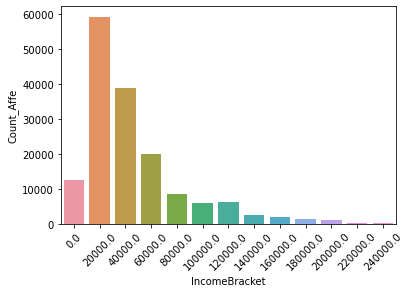

In [16]:
chart=sns.barplot(x=brack.index,y='Count_Affe',data=brack)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


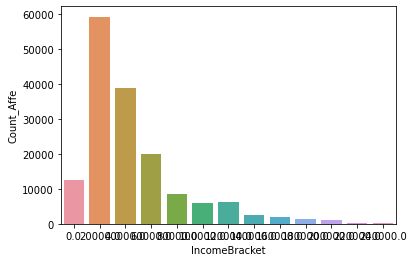

In [17]:
sns.barplot(x=brack.index,y='Count_Affe',data=brack)


In [18]:
blipper=[]
for thing in dropped['Percent_Aff']:
    blipper.append(thing>0.5)

In [19]:
demographics["Maj_Aff"]=blipper

In [20]:
demographics.groupby('Maj_Aff').agg(sum)

,State,County,Tract,BLKGRP,Pop_Total,NH_White,NH_Black,NH_AmInd_A,NH_Asian,NH_Native_,...,Occupied,Vacant,MHI_ACS,Count_Affe,Children_U,SeniorCiti,Count_Af_1,Shape_Leng,Shape_Area,IncomeBracket
Maj_Aff,,,,,,,,,,,,,,,,,,,,,
False,116208,503093,1068663944,5056,5355161.0,1921462.0,910966.0,10328.0,410080.0,2838.0,...,1829818.0,182598.0,149325960.0,119428,412605.0,486677.0,97473,5.623472e+07,1.021615e+11,126480000.0
True,5664,23718,39568714,227,162118.0,37405.0,45515.0,257.0,6985.0,28.0,...,49136.0,5870.0,7142187.0,39405,10354.0,20360.0,37854,2.116177e+06,2.079927e+09,5980000.0


In [21]:
brack

,State,County,Tract,BLKGRP,Pop_Total,NH_White,NH_Black,NH_AmInd_A,NH_Asian,NH_Native_,...,Housing_Un,Occupied,Vacant,MHI_ACS,Count_Affe,Children_U,SeniorCiti,Count_Af_1,Shape_Leng,Shape_Area
IncomeBracket,,,,,,,,,,,,,,,,,,,,,
0.0,7680,33138,62652756,348,213358.0,42612.0,60163.0,642.0,9862.0,183.0,...,85686.0,72878.0,12808.0,1421068.0,12641,20327.0,20754.0,10126,2.694879e+06,2.683591e+09
20000.0,33072,142063,262479175,1428,1217935.0,143685.0,312668.0,1648.0,41004.0,804.0,...,474193.0,410913.0,63280.0,21241232.0,59136,115437.0,96661.0,46617,1.158359e+07,1.319682e+10
40000.0,31632,137285,279894758,1384,1376495.0,382008.0,249179.0,2257.0,91410.0,553.0,...,512043.0,464576.0,47467.0,32418350.0,38829,101238.0,122089.0,33768,1.587978e+07,3.346574e+10
60000.0,20256,87678,200558053,898,1047253.0,392548.0,193800.0,2277.0,83202.0,384.0,...,387412.0,358422.0,28990.0,29058736.0,20014,72024.0,98130.0,17850,1.075859e+07,2.044951e+10
80000.0,11184,48317,112068969,458,629631.0,341901.0,67464.0,1723.0,67060.0,247.0,...,238644.0,223758.0,14886.0,20751744.0,8563,43876.0,66255.0,7907,6.569248e+06,1.169973e+10
100000.0,6624,28476,68236012,273,407850.0,247475.0,38200.0,522.0,41497.0,568.0,...,149239.0,140565.0,8674.0,14982930.0,5913,27758.0,39805.0,5572,3.961451e+06,8.941704e+09
120000.0,4944,22069,54346369,197,302530.0,205500.0,17942.0,588.0,26627.0,61.0,...,110431.0,103945.0,6486.0,13277604.0,6242,21781.0,31939.0,6149,3.222534e+06,6.811400e+09
140000.0,2448,10237,28062034,96,168985.0,96434.0,11103.0,708.0,34704.0,20.0,...,56888.0,54092.0,2796.0,7565599.0,2589,12764.0,14152.0,2495,1.959934e+06,4.899632e+09
160000.0,1872,8309,19454817,100,76864.0,48798.0,4750.0,115.0,12892.0,37.0,...,25673.0,24046.0,1627.0,6591416.0,1869,3653.0,7525.0,1825,7.655753e+05,7.764084e+08


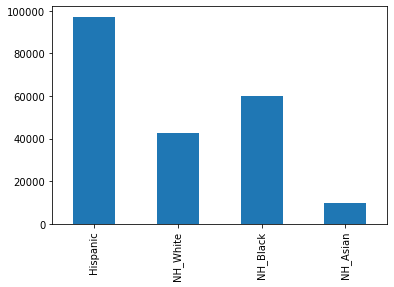

In [22]:
brack = brack[["Hispanic","NH_White","NH_Black","NH_Asian"]]

brack.iloc[0].plot.bar()


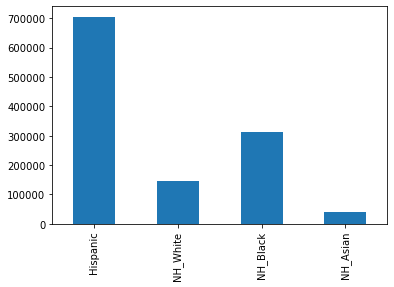

In [23]:
brack.iloc[1].plot.bar()

In [25]:
dropped


,County,Tract,BLKGRP,Pop_Total,Households,Housing_Un,Occupied,Vacant,MHI_ACS,Count_Affe,...,Percent_Black,Percent_AmInd,Percent_Asian,Percent_Native,Percent_Mixed,Percent_Hispanic,Percent_Child,Percent_Senior,PopDensity,Percent_Aff
0,157,670101,1,1092.0,285.0,311.0,285.0,26.0,47321.0,40,...,0.227106,0.000000,0.000000,0.000000,0.009158,0.714286,0.130037,0.102564,0.000256,0.128617
1,157,670101,2,1821.0,466.0,517.0,466.0,51.0,39196.0,79,...,0.316859,0.000000,0.000000,0.000000,0.000000,0.683141,0.047776,0.070840,0.000264,0.152805
2,157,670101,3,2974.0,790.0,912.0,790.0,122.0,49474.0,230,...,0.563551,0.000000,0.000000,0.000000,0.022865,0.402152,0.093141,0.068258,0.000137,0.252193
3,157,670101,4,1495.0,322.0,333.0,322.0,11.0,32619.0,46,...,0.054849,0.000000,0.000000,0.000000,0.000000,0.885619,0.046154,0.097659,0.000475,0.138138
4,157,670102,1,2251.0,716.0,781.0,716.0,65.0,43026.0,154,...,0.497557,0.000000,0.002665,0.000000,0.000000,0.496668,0.067526,0.047979,0.000266,0.197183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,339,692300,2,1619.0,604.0,682.0,604.0,78.0,0.0,0,...,0.032736,0.054972,0.021001,0.019765,0.000000,0.461396,0.072267,0.276096,0.000016,0.000000
2535,339,692500,1,1030.0,293.0,293.0,293.0,0.0,0.0,0,...,0.007767,0.180583,0.000000,0.000000,0.039806,0.095146,0.036893,0.165049,0.000006,0.000000
2536,339,692801,3,1382.0,434.0,462.0,434.0,28.0,0.0,0,...,0.000000,0.006512,0.000000,0.000000,0.223589,0.152677,0.034732,0.086107,0.000010,0.000000
2537,339,694101,3,751.0,256.0,256.0,256.0,0.0,0.0,0,...,0.342210,0.000000,0.000000,0.000000,0.000000,0.358189,0.195739,0.166445,0.000044,0.000000


In [47]:
pog=[]
for thing in svi.LOCATION:
    string=thing
    pog.append(int(float(string[string.index("Tract")+6:string.index(",")])*100))


In [50]:
svi['Tract']=pog

In [52]:
result=pd.merge(dropped,svi,on='Tract')


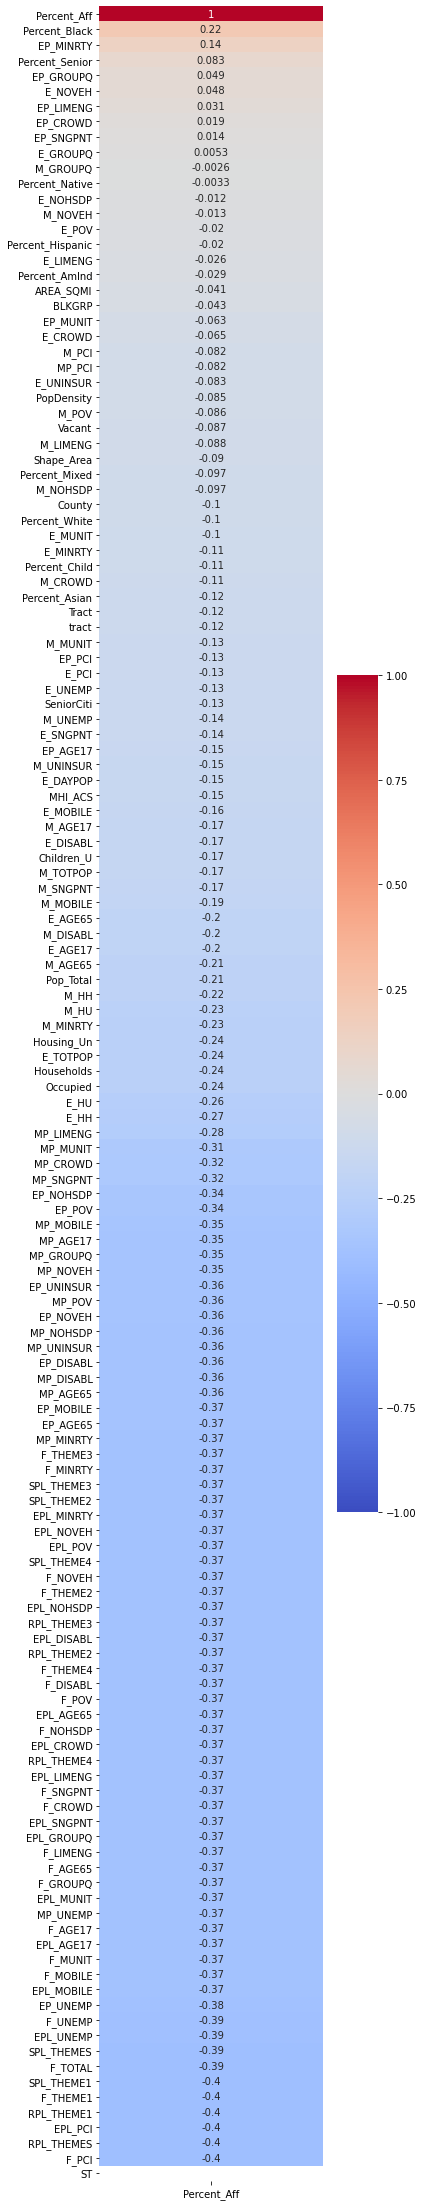

In [59]:
plt.figure(figsize=(5,40))
sns.heatmap(result.drop(columns=['Count_Affe','STCNTY','FIPS']).corr()[['Percent_Aff']].sort_values(by=['Percent_Aff'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)


In [ ]:
demographics=demographics.rename(columns={'Tract':'TRACT'})

result=pd.merge(damage,demographics,on='TRACT')
result=result.drop(columns=['FID','STATE','GEOID','STUSAB','Shape_Leng','Households','Occupied'])
result

In [ ]:
result['Percent_Aff']=result['Count_Affe']/result['Housing_Un']